In [2]:
import pandas as pd

In [3]:
df_stats = pd.read_csv("2022_LoL_esports_match_data_from_OraclesElixir_20220504.csv")
df_stats

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61543,ESPORTSTMNT02_2741315,complete,NaN,NEXO,2022,Split 1,0,2022-05-03 19:42:46,1,12.07,...,146.0,-305.0,-1186.0,-39.0,1.0,2.0,1.0,1.0,1.0,0.0
61544,ESPORTSTMNT02_2741315,complete,NaN,NEXO,2022,Split 1,0,2022-05-03 19:42:46,1,12.07,...,114.0,1093.0,694.0,26.0,1.0,1.0,0.0,1.0,1.0,1.0
61545,ESPORTSTMNT02_2741315,complete,NaN,NEXO,2022,Split 1,0,2022-05-03 19:42:46,1,12.07,...,24.0,252.0,-538.0,2.0,0.0,2.0,1.0,0.0,2.0,1.0
61546,ESPORTSTMNT02_2741315,complete,NaN,NEXO,2022,Split 1,0,2022-05-03 19:42:46,1,12.07,...,527.0,-4643.0,-1342.0,-67.0,2.0,6.0,3.0,3.0,6.0,2.0


**Make different dataframes for each specific role**

In [4]:
df_top = df_stats[df_stats["position"] == "top"]
df_mid = df_stats[df_stats["position"] == "mid"]
df_jungle = df_stats[df_stats["position"] == "jng"]
df_bot = df_stats[df_stats["position"] == "bot"]
df_sup = df_stats[df_stats["position"] == "sup"]

**Find average amount of kills per role**

In [5]:
df_top_avg_kills = df_top["kills"].mean()
df_top_avg_kills

2.7981087931370636

In [6]:
df_mid_avg_kills = df_mid["kills"].mean()
df_mid_avg_kills

3.5058490933905246

In [7]:
df_jungle_avg_kills = df_jungle["kills"].mean()
df_jungle_avg_kills

3.0125755507896277

In [8]:
df_bot_avg_kills = df_bot["kills"].mean()
df_bot_avg_kills

4.264281536361864

In [9]:
df_sup_avg_kills = df_sup["kills"].mean()
df_sup_avg_kills

0.8293039578865276

**Visual graphs to compare how often players finished with x amount of kills**

Larger bars with farther range at the right is better in terms of looking for kill potential

<AxesSubplot:>

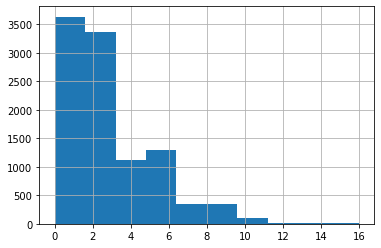

In [10]:
df_top["kills"].hist()

<AxesSubplot:>

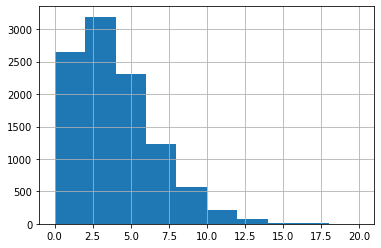

In [11]:
df_mid["kills"].hist()

<AxesSubplot:>

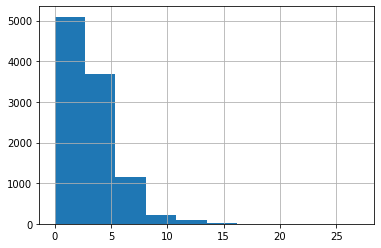

In [12]:
df_jungle["kills"].hist()

<AxesSubplot:>

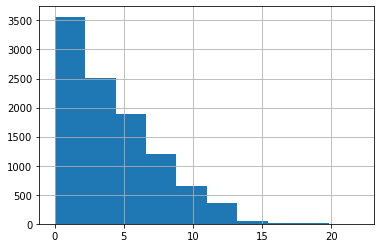

In [13]:
df_bot["kills"].hist()

<AxesSubplot:>

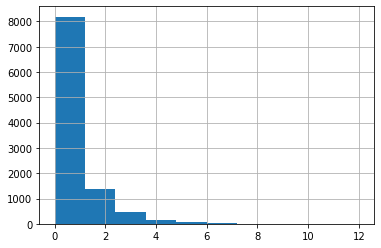

In [14]:
df_sup["kills"].hist()

**Find top 10 champions that had most amount of kills per role**

In [15]:
df_top_champs = df_top.groupby("champion").agg("sum").reset_index()
df_top_champs_kills = pd.DataFrame()
df_top_champs_kills["Champion"] = df_top_champs["champion"]
df_top_champs_kills["Total Kills"] = df_top_champs["kills"]
df_top_champs_kills["Early Game Kills"] = df_top_champs["killsat15"]
df_top_champs_kills.nlargest(10, "Total Kills")

,Champion,Total Kills,Early Game Kills
20,Gwen,3412,483.0
26,Jayce,2958,472.0
7,Camille,2387,510.0
17,Gnar,2345,376.0
19,Graves,2293,306.0
74,Tryndamere,1656,300.0
2,Akali,1420,256.0
56,Renekton,1284,322.0
0,Aatrox,1040,214.0
18,Gragas,978,221.0


In [16]:
df_mid_champs = df_mid.groupby("champion").agg("sum").reset_index()
df_mid_champs_kills = pd.DataFrame()
df_mid_champs_kills["Champion"] = df_mid_champs["champion"]
df_mid_champs_kills["Total Kills"] = df_mid_champs["kills"]
df_mid_champs_kills["Early Game Kills"] = df_mid_champs["killsat15"]
df_mid_champs_kills.nlargest(10, "Total Kills")

,Champion,Total Kills,Early Game Kills
1,Ahri,4359,920.0
82,Viktor,4216,712.0
58,Ryze,3782,910.0
38,LeBlanc,2557,571.0
80,Vex,2498,505.0
14,Corki,2406,314.0
68,Syndra,1932,490.0
50,Orianna,1860,344.0
2,Akali,1718,364.0
67,Sylas,1508,424.0


In [17]:
df_jungle_champs = df_jungle.groupby("champion").agg("sum").reset_index()
df_jungle_champs_kills = pd.DataFrame()
df_jungle_champs_kills["Champion"] = df_jungle_champs["champion"]
df_jungle_champs_kills["Total Kills"] = df_jungle_champs["kills"]
df_jungle_champs_kills["Early Game Kills"] = df_jungle_champs["killsat15"]
df_jungle_champs_kills.nlargest(10, "Total Kills")

,Champion,Total Kills,Early Game Kills
16,Lee Sin,5544,1982.0
47,Viego,5482,1549.0
50,Xin Zhao,5077,1781.0
8,Hecarim,3153,1049.0
48,Volibear,2243,756.0
10,Jarvan IV,1794,773.0
0,Diana,1386,452.0
41,Trundle,1102,367.0
6,Graves,922,279.0
7,Gwen,586,152.0


In [18]:
df_bot_champs = df_bot.groupby("champion").agg("sum").reset_index()
df_bot_champs_kills = pd.DataFrame()
df_bot_champs_kills["Champion"] = df_bot_champs["champion"]
df_bot_champs_kills["Total Kills"] = df_bot_champs["kills"]
df_bot_champs_kills["Early Game Kills"] = df_bot_champs["killsat15"]
df_bot_champs_kills.nlargest(10, "Total Kills")

,Champion,Total Kills,Early Game Kills
14,Jinx,12634,2029.0
1,Aphelios,9573,1684.0
53,Zeri,4193,684.0
13,Jhin,3617,670.0
49,Xayah,2435,436.0
4,Caitlyn,1897,430.0
9,Ezreal,1816,370.0
15,Kai'Sa,1762,301.0
44,Varus,956,268.0
23,Lucian,620,155.0


In [19]:
df_sup_champs = df_sup.groupby("champion").agg("sum").reset_index()
df_sup_champs_kills = pd.DataFrame()
df_sup_champs_kills["Champion"] = df_sup_champs["champion"]
df_sup_champs_kills["Total Kills"] = df_sup_champs["kills"]
df_sup_champs_kills["Early Game Kills"] = df_sup_champs["killsat15"]
df_sup_champs_kills.nlargest(10, "Total Kills")

,Champion,Total Kills,Early Game Kills
23,Nautilus,1707,621.0
16,Leona,1202,445.0
46,Thresh,774,305.0
28,Rakan,722,264.0
44,Tahm Kench,611,215.0
14,Karma,467,177.0
18,Lux,329,112.0
17,Lulu,295,142.0
30,Renata Glasc,293,81.0
35,Sett,265,67.0


**Find Average CS per Minute per role**

7.900421865860792

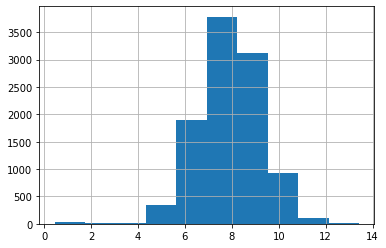

In [20]:
df_top["cspm"].hist()
df_top["cspm"].mean()

8.283604347826088

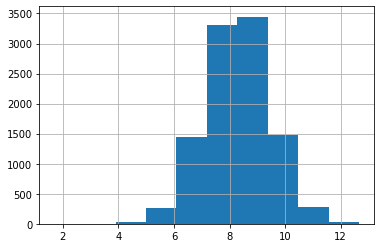

In [21]:
df_mid["cspm"].hist()
df_mid["cspm"].mean()

5.659065919282511

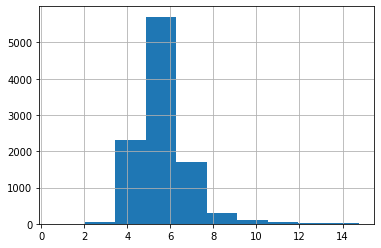

In [22]:
df_jungle["cspm"].hist()
df_jungle["cspm"].mean()

9.035380366543185

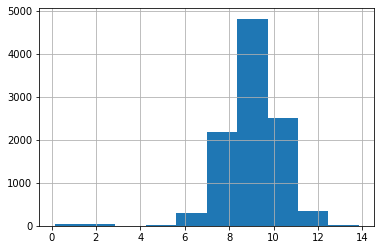

In [23]:
df_bot["cspm"].hist()
df_bot["cspm"].mean()

1.1043373172158315

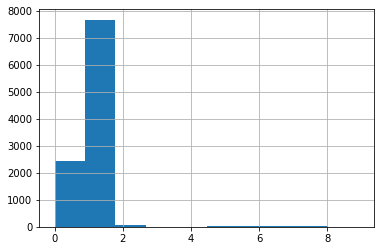

In [24]:
df_sup["cspm"].hist()
df_sup["cspm"].mean()